# Exercises - Overview

- Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

#### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

    - Null: There is no difference or change in average network latency post-switch
    - Alt: There has been an increase in average network latency post_switchy
    - True Positive (correctly rejecting null hypothesis): Testing shows 5% increase in network latency
    - True Negative: Testing shows 0% change in network latency
    - Type 1 Error: Suggesting there is no difference before testing shows a differnce
    - Type 2 Error: Suggesting there is a difference before testing fails to show a difference
    

- Is the website redesign any good?

    - Rewrite: Have customer feeback survey's shown an increase in positive remarks about the website design?
    - Null: % of positive design remarks has not changed. 
    - Alt: There has been a change % of positive remarks about website design. 
    - True Positive: Identifying a change in positive remarks
    - True Negative: Identifying no change in positive remarks
    - Type 1: Model suggests there was change in feedback. Testing shows there was no change.
    - Type 2: Model suggests there will be no change  in feedback. Testing shows change. 

- Is our television ad driving more sales?

    - Rewrite: A greater than previous percentage of customers report having been exposed to ad campaign
    - Null: There will no change in % of customers that report ad impression
    - Alt: There will be a change 
    - True Positive: Both model and testing show a change in customer ad impressions
    - True Negative: Both model and testing show no change in customer ad impressions
    - Type 1: Model suggests change, testing shows no change.
    - Type 2: Model suggest no change, testing shows change. 

# Exercises - T-Test
Continue working in your hypothesis_testing notebook.

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
    * A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
    * A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

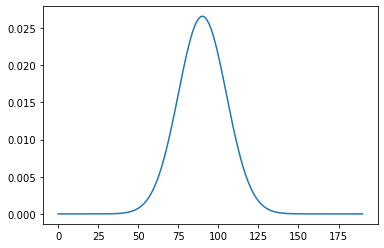

In [2]:
office_one_dist = stats.norm(90, 15)
x1 = np.arange(0,191,1)
y1 = office_one_dist.pdf(x1)
plt.plot(x1,y1)
office_one_exp = office_one_dist.rvs(40)

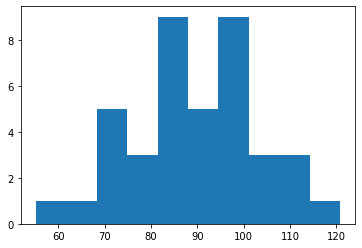

In [3]:
plt.hist(office_one_exp)
plt.show()

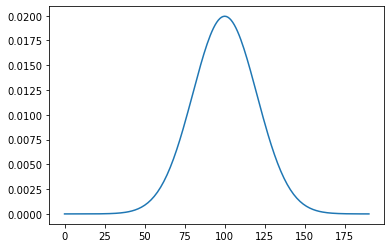

In [4]:
office_two_dist = stats.norm(100, 20)
x2 = np.arange(0,191,1)
y2 = office_two_dist.pdf(x2)
plt.plot(x2,y2)
office_two_exp = office_two_dist.rvs(50)

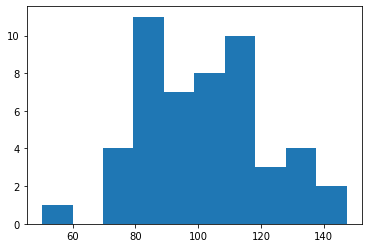

In [5]:
plt.hist(office_two_exp)
plt.show()

In [6]:
office_one_exp.var(), office_two_exp.var()

(185.63963054321948, 376.2240451376567)

In [7]:
office_t, office_p = stats.ttest_ind(office_one_exp, office_two_exp, equal_var=False) 

In [8]:
office_t, office_p

(-3.542841052644177, 0.0006400271958292947)

In [9]:
office_p < .05

True

Load the mpg dataset and use it to answer the following questions:


In [10]:
from pydataset import data

In [11]:
mpg = pd.DataFrame(data('mpg'))

In [12]:
mpg['efficiency'] = (mpg.cty + mpg.hwy) / 2

## Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

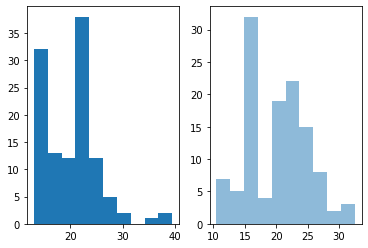

In [15]:
old_cars = mpg[mpg.year == 1999]

new_cars = mpg[mpg.year == 2008]

n_row = 1
n_col = 2
plt.figure()
plt.subplot(n_row, n_col, 1)
plt.hist(old_cars['efficiency'])

plt.subplot(n_row, n_col, 2)
plt.hist(new_cars['efficiency'], alpha=.5)
plt.show()

* hypothesis
* H0: there is no change difference in fuel-efficiency
* Ha: there is significant difference 
* significance level
    * $ {\alpha} $ = .05

In [ ]:
#verify assumptions
 #check, check, and check, 

In [ ]:
old_cars.efficiency.var(), new_cars.efficiency.var()

In [ ]:
t, p = stats.ttest_ind(old_cars.efficiency, new_cars.efficiency, equal_var=False)

In [ ]:
t, p

In [ ]:
p < .05 # --> failure to reject null hypothesis

In [ ]:
stats.ttest_ind_from_stats(90, 15, 40, 100,20,50, equal_var=False)

### Are compact cars more fuel-efficient than the average car?

In [ ]:
#hypothesis 
# H0: no difference 
# Ha: significantly larger
# alpha = .05

In [ ]:
compacts = mpg[mpg['class'] == 'compact']

In [ ]:
t, p = stats.ttest_1samp(compacts.efficiency, mpg.efficiency.mean())

In [ ]:
p/2 < .05

In [ ]:
t > 0

In [ ]:
#both true reject null hypothesis

### Do manual cars get better gas mileage than automatic cars?
H0: manual <= automatic
Ha: manual > automatic 
alpha: .05


In [ ]:
manuals = mpg[mpg['trans'].str.contains('auto') == False]
automatics = mpg[mpg['trans'].str.contains('auto')]

In [ ]:
t, p = stats.ttest_ind(manuals.efficiency, automatics.efficiency, equal_var=False)

In [ ]:
p/2 < .05

In [ ]:
t > 0 #--> reject null

# Exercises: Correlation

#### Continue working in your hypothesis_testing notebook.

#### Use the telco_churn data. 

In [ ]:
telco_churn = pd.read_csv('Cust_Churn_Telco.csv')

### Does tenure correlate with monthly charges? 

In [ ]:
#hypothesis 
# H0: no difference 
# Ha: significantly larger --> \uobvs > uth
# alpha = .05

In [ ]:
corr, p = stats.pearsonr(telco_churn.tenure, telco_churn.MonthlyCharges)
print(corr, p)

In [ ]:
plt.scatter(telco_churn.tenure, telco_churn.MonthlyCharges, s=2)
plt.show()

### Total charges? 

In [ ]:
telco_churn.TotalCharges = pd.to_numeric(telco_churn.TotalCharges, errors='coerce')

In [ ]:
plt.scatter(telco_churn.tenure, telco_churn.TotalCharges, s=2)
plt.show()

In [ ]:
corr, p = stats.pearsonr(telco_churn.tenure, telco_churn.TotalCharges.interpolate(method='linear'))
print(corr, p)

### What happens if you control for phone and internet service?

In [ ]:
#plot them
sns.relplot(data=telco_churn, x='tenure', y='MonthlyCharges', col='InternetService')
sns.relplot(data=telco_churn, x='tenure', y='MonthlyCharges', col='PhoneService')
plt.show()

In [ ]:
with_phone = telco_churn[telco_churn.PhoneService == 'Yes']
corr, p = stats.pearsonr(with_phone.tenure, with_phone.TotalCharges.interpolate(method='pad'))
print(corr, p)

In [ ]:
without_phone = telco_churn[telco_churn.PhoneService == 'No']
corr, p = stats.pearsonr(without_phone.tenure, without_phone.TotalCharges.interpolate(method='pad'))
print(corr, p)

In [ ]:
with_internet = telco_churn[telco_churn.InternetService != 'No']
without_internet = telco_churn[telco_churn.InternetService == 'No']

In [ ]:
corr, p = stats.pearsonr(with_internet.tenure, with_internet.TotalCharges.interpolate(method='pad'))
print(corr, p)

In [ ]:
corr, p = stats.pearsonr(without_internet.tenure, without_internet.TotalCharges.interpolate(method='pad'))
print(corr, p)

## Use the employees database.

In [ ]:
from env import host, user, password
import datetime

emp_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

emp_sql = """
SELECT*
FROM employees
JOIN salaries USING (emp_no)
WHERE salaries.to_date > now()
"""

emp_df = pd.read_sql(emp_sql, emp_url)

### Is there a relationship between how long an employee has been with the company and their salary?

In [ ]:
emp_df['hire_date'] = pd.to_datetime(emp_df['hire_date'])

emp_df['tenure'] = datetime.datetime.now() - emp_df['hire_date']

emp_df['tenure'] = emp_df.tenure.dt.days

In [ ]:
sns.relplot(data=emp_df, x=emp_df.tenure/365 , y=emp_df.salary, aspect=5)
plt.show()

In [ ]:
corr, p = stats.pearsonr(emp_df.tenure, emp_df.salary)
print(corr, p)

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
titles_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

titles_sql = """
SELECT emp_no, count(emp_no) as 'titles', employees.hire_date
FROM employees
JOIN titles USING (emp_no)
JOIN salaries USING (emp_no)
WHERE salaries.to_date > now()
GROUP BY employees.emp_no
;
"""

titles = pd.read_sql(titles_sql, titles_url)
titles_df = pd.DataFrame(titles)

In [ ]:
emp_df = emp_df.merge(titles, on='emp_no')

In [ ]:
sns.relplot(data=emp_df, x=emp_df.titles, y=emp_df.tenure)
plt.show()

In [ ]:
corr, p = stats.pearsonr(emp_df.tenure, emp_df.titles)
print(corr, p)

## Use the sleepstudy data.
### Is there a relationship between days and reaction time?

In [ ]:
from pydataset import data

sleep_study = data('sleepstudy')

In [ ]:
sns.relplot(data=sleep_study, x=sleep_study.Days, y=sleep_study.Reaction)
plt.show()

In [ ]:
corr, p = stats.pearsonr(sleep_study.Days, sleep_study.Reaction)
print(corr, p)